# Nigeria Bank Sentiment Analysis Using Natural Language Processing and Classification Modeling
***
A notebook by Precious Ndubuisi. 
***

It has become a major concern to customers of financial institutions across the country over inadequate practices
while some are lamenting over these practices, others are favoured by their finanacial instutition. This analysis is focused on the review of customers using Natural Launguage Processing (NLP) techniques and classification models. With the recent trend on Twitter, I decided to mine tweets with the keywords *uselss bank, worst bank and bank transaction* using Snscrape. I retrieved over 27,000 unique tweets. some of the libraries are used for this notebook are Pandas (for data manipulation/cleaning/analyzing), Matplotlib, Seaborn, WordCloud (for data visualization), Snsscrape (for tweet mine), NLTK (for applying NLP), TextBlob (for sentiment analysis), Scikit-learn (for modeling). sit back let's enjoy the ride.  

<a id="0"></a> <br>
# Table of Content
1. [Import Libraries](#1)
2. [Tweet Mining](#2)
3. [Data Cleaning](#3)
4. [Data/Tweet Preprocessing](#7)
5. [Sentiment Analysis](#21)
6. [Data Exploration](#30)
7. [Classification](#46)
8. [Closing Remark and links](#63)

# 1. Import Libraries
A library is a colection of function that can be used in theis notebook. Let's import some of these muodulaes s we procced  on this project

In [1]:
import snscrape.modules.twitter as sntwitter # for tweet mining
import pandas as pd #for data cleaning
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt #for data visualization
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob #for text sentiment and processing word data
from wordcloud import WordCloud # for creating word visualization
from nltk.tokenize import word_tokenize # for word tokens
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

## 2. Tweet Mining
To scrape tweets I used Snscrpe as it allows me to mine tweets of more than 1 month unlike Tweepy.

### Proceduresand user-defined tweets mined.
I scraped for data from 1st November to 28th December, 10,000 tweets was mined using 3 different words (making it 30,000), "useless bank", "bank transaction" and "worst bank." Snscrape was handy although for some kyword fall short of its tweet limit of 10,000.

In [28]:
query = "worst bank  until:2022-12-28 since:2022-11-01" #here is the keyword and the date of tweet I want to mine
tweets=[]
limit = 10000 # here I call a function and set a limit of how many tweet that I want to mine

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.username, tweet.date, tweet.content]) #to scrape tweet handles, date and content
            

df_worst_banks = pd.DataFrame(tweets, columns=['user', 'date','tweet']) #we create a dataframe for user id, date and tweets

In [29]:
df_worst_banks

,user,date,tweet
0,MegaNewsUpdates,2022-12-27 11:47:14+00:00,"🚨 Rupee’s worst is likely over, to gain in 202..."
1,Dipansh38005134,2022-12-27 11:44:29+00:00,The worst bank in the history of banking is @r...
2,PallerlaNaresh6,2022-12-27 11:44:19+00:00,I took airtelpayment bank account.Account was ...
3,IndianExpress,2022-12-27 11:30:15+00:00,"Rupee's worst is likely over, to gain in 2023:..."
4,robintt1990,2022-12-27 11:29:15+00:00,@HSBC_UAE im new to hsbc and i must say the wo...
...,...,...,...
9995,RoshanJ04583183,2022-11-21 12:11:03+00:00,@KotakBankLtd Worst bank koi reply nhi msg ka ...
9996,MichaelFarah961,2022-11-21 12:07:13+00:00,@CapitecBankSA is the worst bank I've ever ban...
9997,kushalchinu,2022-11-21 12:03:16+00:00,@KotakCares each and every day I am visiting t...
9998,iambapu08,2022-11-21 11:57:23+00:00,@AxisBankSupport Worst service at axis bank k...


In [26]:
# just a repeat of the previous step
query = "bank transaction until:2022-12-28 since:2022-11-01"
tweets=[]
limit = 10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.username, tweet.date, tweet.content])
            

bank_transaction = pd.DataFrame(tweets, columns=['user', 'date','tweet'])

In [27]:
bank_transaction

,user,date,tweet
0,GoibiboSupport,2022-12-27 11:31:56+00:00,"@er_soumya Hi Soumya,\n\nWe already informed y..."
1,zomatocare,2022-12-27 11:31:27+00:00,@Hemant27367066 transaction processing is TXN3...
2,isoumyasinha,2022-12-27 11:30:42+00:00,@TheOfficialSBI I made a UPI transaction on 09...
3,airtelbank,2022-12-27 11:28:26+00:00,@Sandeep61421534 Hi Sandeep! Please do not pro...
4,NotFroxity,2022-12-27 11:26:33+00:00,"The things I learned today is, isi minyak moto..."
...,...,...,...
9995,n_shekar_IND,2022-12-07 11:43:32+00:00,. @RBI I have a question on CBDC - there are s...
9996,AxisBankSupport,2022-12-07 11:43:29+00:00,@ShubegN transaction or download any app or pa...
9997,stalliondelsur,2022-12-07 11:41:55+00:00,@JamesGRickards Transactions without intermedi...
9998,DinmaChekwas,2022-12-07 11:34:22+00:00,@keystonebankng What is the code for Keystone ...


In [24]:
# a repeat of the previous steps
query = "useless bank until:2022-12-28 since:2022-11-01"
tweets=[]
limit = 10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.username, tweet.date, tweet.content])
            

useless_bank = pd.DataFrame(tweets, columns=['user', 'date','tweet'])

In [25]:
useless_bank #I call this function to have a view of what are data looks like

,user,date,tweet
0,samuelode101,2022-12-27 11:19:52+00:00,@PapielChulo1 @kudahelp_ng Kuda na useless ban...
1,gyal_vibe,2022-12-27 11:11:39+00:00,Zenith bank and fcmb has to be the most useles...
2,oshigwe1960,2022-12-27 11:08:36+00:00,@Agunbiade_Gafar @kudahelp_ng I have abandoned...
3,heis_Lotanna,2022-12-27 11:01:55+00:00,@UBAFoundation the most useless bank https://t...
4,oil_shaeikh,2022-12-27 10:57:50+00:00,Na with these kind bank useless network Emefie...
...,...,...,...
8587,Sohaib97381710,2022-11-01 02:17:17+00:00,@PakistanIsIK @Lalaruk70651159 @MoeedNj But so...
8588,FritzHeisenb3rg,2022-11-01 01:38:33+00:00,@Bitboy_Crypto Yeah this is nonsense. The onl...
8589,_Andae,2022-11-01 01:32:58+00:00,@ZenithBank This bank is as useless as Buhari’...
8590,TerriChu,2022-11-01 00:40:22+00:00,Do ppl understand that using the not withstand...


#### We save all data in csv format

In [49]:
df_worst_banks.to_csv('worst_bank.csv', index = False) #let's save/export our data as csv
bank_transaction.to_csv('bank_transaction.csv', index = False)
useless_bank.to_csv('useless_bank.csv', index = False)

#### Let's merge all data into a single dataframe

In [14]:
import os

df = pd.read_csv('useless_bank.csv')

files = [file for file in os.listdir('./bank')]#to make it easier, i created  a folder with all the data. Use your path
bank_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./bank/'+file)
    bank_data = pd.concat([bank_data, df]) #merge all data
bank_data.to_csv('bank_data.csv', index = False) #convert your data to csv 
    



In [2]:
bank_data = pd.read_csv('bank_data.csv') #Load the CSV into a dataframe
bank_data 

,user,date,tweet
0,GoibiboSupport,2022-12-27 11:31:56+00:00,"@er_soumya Hi Soumya,\n\nWe already informed y..."
1,zomatocare,2022-12-27 11:31:27+00:00,@Hemant27367066 transaction processing is TXN3...
2,isoumyasinha,2022-12-27 11:30:42+00:00,@TheOfficialSBI I made a UPI transaction on 09...
3,airtelbank,2022-12-27 11:28:26+00:00,@Sandeep61421534 Hi Sandeep! Please do not pro...
4,NotFroxity,2022-12-27 11:26:33+00:00,"The things I learned today is, isi minyak moto..."
...,...,...,...
28587,RoshanJ04583183,2022-11-21 12:11:03+00:00,@KotakBankLtd Worst bank koi reply nhi msg ka ...
28588,MichaelFarah961,2022-11-21 12:07:13+00:00,@CapitecBankSA is the worst bank I've ever ban...
28589,kushalchinu,2022-11-21 12:03:16+00:00,@KotakCares each and every day I am visiting t...
28590,iambapu08,2022-11-21 11:57:23+00:00,@AxisBankSupport Worst service at axis bank k...


## 3. Data Cleaning
Now we have glimpse of our dataset, let's fix bad data, create new columns, drop duplicates and locate missing values.
This section wil overlap to the next, the reason fo this is to help me carry out the right step at the right time and place.

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28592 entries, 0 to 28591
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    28592 non-null  object
 1   date    28592 non-null  object
 2   tweet   28592 non-null  object
dtypes: object(3)
memory usage: 670.2+ KB


In [4]:
bank_data.isnull().any()

user     False
date     False
tweet    False
dtype: bool

In [5]:
bank_data.shape

(28592, 3)

In [6]:
# There are a lot we can achieve with this data but for the time being let's focus on the Tweet text and drop 
#other columns

tweet_text = bank_data[['tweet']]
tweet_text

,tweet
0,"@er_soumya Hi Soumya,\n\nWe already informed y..."
1,@Hemant27367066 transaction processing is TXN3...
2,@TheOfficialSBI I made a UPI transaction on 09...
3,@Sandeep61421534 Hi Sandeep! Please do not pro...
4,"The things I learned today is, isi minyak moto..."
...,...
28587,@KotakBankLtd Worst bank koi reply nhi msg ka ...
28588,@CapitecBankSA is the worst bank I've ever ban...
28589,@KotakCares each and every day I am visiting t...
28590,@AxisBankSupport Worst service at axis bank k...


## 4. Data/Tweet Preprocessing

I can't achieve must without going the extra mile of cleaning the *tweet* column. I decided to remove unwanted character/symbols, drop some duplicate, create a list of bank names (these are names that well indicate customer plight or praise). I created a bank name into a new column.

In [7]:
def data_processing(tweet):
    tweet= tweet.lower() #change all words to lowercase
    tweet = re.sub(r'https\S+|www\S+https\S+', '', tweet, flags=re.MULTILINE) #remove links/url
    tweet = re.sub(r'@w+|\#','',tweet) #remove hashtags and special symbols
    tweet = re.sub(r'[^\w\s]','',tweet)
    #remove stop words
    tweet_tokens = word_tokenize(tweet) #convert strings to tokens
    filtered_text = [w for w in tweet_tokens if not w in stop_words]
    return ' '.join(filtered_text)

In [66]:
import warnings 
warnings.filterwarnings('ignore')#I use this pip to remove warning messages
tweet_text['clean_tweet'] = tweet_text['tweet'].apply(data_processing) #apply data preprocess tweets
tweet_text

,tweet,clean_tweet,bank_names,polarity,sentiment
0,"@er_soumya Hi Soumya,\n\nWe already informed y...",er_soumya hi soumya already informed rare inst...,,0.100000,POSITIVE
1,@Hemant27367066 transaction processing is TXN3...,hemant27367066 transaction processing txn30284...,,0.250000,POSITIVE
2,@TheOfficialSBI I made a UPI transaction on 09...,theofficialsbi made upi transaction 09 decembe...,,0.000000,Neutral
3,@Sandeep61421534 Hi Sandeep! Please do not pro...,sandeep61421534 hi sandeep please provide acco...,,0.000000,Neutral
4,"The things I learned today is, isi minyak moto...",things learned today isi minyak motor pakai de...,,0.000000,Neutral
...,...,...,...,...,...
28587,@KotakBankLtd Worst bank koi reply nhi msg ka ...,kotakbankltd worst bank koi reply nhi msg ka b...,,-0.850000,NEGATIVE
28588,@CapitecBankSA is the worst bank I've ever ban...,capitecbanksa worst bank ive ever banked absol...,,-0.450000,NEGATIVE
28589,@KotakCares each and every day I am visiting t...,kotakcares every day visiting bank reply getti...,,-0.133333,NEGATIVE
28590,@AxisBankSupport Worst service at axis bank k...,axisbanksupport worst service axis bank khadat...,,-0.566667,NEGATIVE


In [9]:
# Let's drop duplicate(s) to avoid repetitions
tweet_text = tweet_text.drop_duplicates('clean_tweet')
tweet_text

,tweet,clean_tweet
0,"@er_soumya Hi Soumya,\n\nWe already informed y...",er_soumya hi soumya already informed rare inst...
1,@Hemant27367066 transaction processing is TXN3...,hemant27367066 transaction processing txn30284...
2,@TheOfficialSBI I made a UPI transaction on 09...,theofficialsbi made upi transaction 09 decembe...
3,@Sandeep61421534 Hi Sandeep! Please do not pro...,sandeep61421534 hi sandeep please provide acco...
4,"The things I learned today is, isi minyak moto...",things learned today isi minyak motor pakai de...
...,...,...
28587,@KotakBankLtd Worst bank koi reply nhi msg ka ...,kotakbankltd worst bank koi reply nhi msg ka b...
28588,@CapitecBankSA is the worst bank I've ever ban...,capitecbanksa worst bank ive ever banked absol...
28589,@KotakCares each and every day I am visiting t...,kotakcares every day visiting bank reply getti...
28590,@AxisBankSupport Worst service at axis bank k...,axisbanksupport worst service axis bank khadat...


In [10]:
# Full list of Mst bank anmes in this trend, to avoid name repetitions/duplicates I used bank names and abbr

bank_list = ['zenith', 'zenithbank', 'gtb', 'gtbank', 'kuda','kudabank', 'eco', 'ecobank', 'access','first bank',  
             'jaize', 'polaris', 'wema', 'alat', 'ubagroup','uba', 'sterling', 'fidelity', 'vbank',
            'unionbank', 'unitybank', 'fcmb', 'stanchart', 'palmpay', 'keystone']  
               
              
              

In [11]:
def getBankNames(tweet):
    tweet = tweet.lower() #to create uniformity, I lowered the cases
    tweet_tokens = word_tokenize(tweet) #to split words
    bank_names = [bank for bank in tweet_tokens if bank in bank_list] #to extract bank names
    return " ".join(bank_names)

In [67]:
tweet_text['bank_names'] = tweet_text['tweet'].apply(getBankNames) #apply the getbanknames and create a new column

In [13]:
tweet_text.loc[(tweet_text['bank_names'] == 'access')] #view the effect of my code

,tweet,clean_tweet,bank_names
87,you failed to attend to the very fundamental i...,failed attend fundamental issues receiving val...,access
88,$882.49 for POS failed transaction. Common acc...,88249 pos failed transaction common access ban...,access
190,@myaccessbank My transaction yesterday evening...,myaccessbank transaction yesterday evening deb...,access
276,@joinkuda @kudahelp_ng sent a mail since morni...,joinkuda kudahelp_ng sent mail since morning c...,access
447,@heritagebankplc Heritage bank pls kindly cred...,heritagebankplc heritage bank pls kindly credi...,access
...,...,...,...
27881,ACCESS BANK IS THE WORST FUCKING BANK IN THE W...,access bank worst fucking bank world myaccessb...,access
28015,@accessbank_help @myaccessbank Access bank is ...,accessbank_help myaccessbank access bank worst...,access
28020,@ingoditrust999 @AlliantCU Good luck!They have...,ingoditrust999 alliantcu good luckthey worst c...,access
28190,@myaccessbank the worst customer care ever is ...,myaccessbank worst customer care ever access b...,access


In [14]:
# To avoid name repetitions I replace names
def correctBankNames(bank_names):
    replacements = [('zenithbank', 'zenith'), ('gtbank', 'gtb'), ('kudabank', 'kuda'), ('ecobank', 'eco'),
                  ('accessbank', 'access'), ('first bank', 'firstbank'), ('ubagroup', 'uba'), ('wemabank', 'wema')]
    for pat, repl in replacements:
        bank_names= re.sub(pat, repl, bank_names)
    return bank_names

In [15]:
tweet_test = 'the ecobank of kudabank zenithbank to gtbank an accessbank to first bank wemabank'
correctBankNames(tweet_test)

'the eco of kuda zenith to gtb an access to firstbank wema'

In [68]:
tweet_text['bank_names'] = tweet_text['bank_names'].apply(correctBankNames) #Applying our functions

In [17]:
bank_listing = tweet_text['bank_names'].tolist()
#iterate all bank names
banks = []
for item in bank_listing:
    item = item.split()
    for i in item:
        banks.append(i)



In [18]:
# This function is used to make a unique count of all bank names
from collections import Counter
counts = Counter(banks)
bank_df = pd.DataFrame.from_dict(counts, orient = 'index').reset_index()
bank_df.columns = ['Banks', 'Count']
bank_df.sort_values(by = 'Count', ascending = False, inplace = True)
print(f'Total Number of Unique Banks: {bank_df.shape[0]}')
bank_df.head(20)

Total Number of Unique Banks: 17


,Banks,Count
1,zenith,2714
8,gtb,960
5,access,912
3,uba,850
2,kuda,306
10,fidelity,181
9,sterling,148
0,wema,114
12,polaris,82
14,fcmb,82


In [19]:
bank_df['Count'].sum()

6629

In [20]:
bank_df['percentage'] = (bank_df['Count']/bank_df['Count'].sum()*100)
bank_df.head(16)

,Banks,Count,percentage
1,zenith,2714,40.941318
8,gtb,960,14.481822
5,access,912,13.757731
3,uba,850,12.822447
2,kuda,306,4.616081
10,fidelity,181,2.730427
9,sterling,148,2.232614
0,wema,114,1.719716
12,polaris,82,1.236989
14,fcmb,82,1.236989


NameError: name 'bank_df' is not defined

## 5. Sentiment Analysis
I created a polarity to ascertain the score of every tweet from negative, positive to neutral, plotted a bar and pie chart customers perception

In [21]:
# I decided to use Stemmer to remove suffixs
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [69]:
tweet_text['clean_tweet'] = tweet_text['clean_tweet'].apply(lambda x: stemming(x)) #apply our function

In [23]:
#To obtain polarity score, i created this function TextBlob
from textblob import TextBlob

def polarity(clean_tweet):
    return TextBlob(clean_tweet).sentiment.polarity

In [70]:
tweet_text['polarity'] = tweet_text['clean_tweet'].apply(polarity) #I applied the function and created a new column
tweet_text.head(10)

,tweet,clean_tweet,bank_names,polarity,sentiment
0,"@er_soumya Hi Soumya,\n\nWe already informed y...",er_soumya hi soumya already informed rare inst...,,0.100000,POSITIVE
1,@Hemant27367066 transaction processing is TXN3...,hemant27367066 transaction processing txn30284...,,0.250000,POSITIVE
2,@TheOfficialSBI I made a UPI transaction on 09...,theofficialsbi made upi transaction 09 decembe...,,0.000000,Neutral
3,@Sandeep61421534 Hi Sandeep! Please do not pro...,sandeep61421534 hi sandeep please provide acco...,,0.000000,Neutral
4,"The things I learned today is, isi minyak moto...",things learned today isi minyak motor pakai de...,,0.000000,Neutral
5,@DesaiHimaja We are sorry to hear this. Withdr...,desaihimaja sorry hear withdrawals take upto 3...,,-0.500000,NEGATIVE
6,@Avi_monu10 at unauthorisedtransaction@sbi.co...,avi_monu10 unauthorisedtransactionsbicoin call...,,0.100000,POSITIVE
7,@Avi_monu10 In order to assist you more effect...,avi_monu10 order assist effectively kindly ela...,,0.466667,POSITIVE
8,@KotakBankLtd \nI am yet to receive my credit ...,kotakbankltd yet receive credit card fraud txn...,,0.000000,Neutral
9,@CTeeBlack @olamiotan_1 @ConvertedCode_1 @Ekit...,cteeblack olamiotan_1 convertedcode_1 ekitipik...,,0.000000,Neutral


In [25]:
#To obtain sentiment score, I created this function TextBlob
def sentiment(label):
    if label <0:
        return "NEGATIVE"
    elif label ==0:
        return "Neutral"
    elif label >0:
        return 'POSITIVE'

In [71]:
tweet_text['sentiment'] = tweet_text["polarity"].apply(sentiment) #We applied the function and create new column
tweet_text.tail()

,tweet,clean_tweet,bank_names,polarity,sentiment
28587,@KotakBankLtd Worst bank koi reply nhi msg ka ...,kotakbankltd worst bank koi reply nhi msg ka b...,,-0.850000,NEGATIVE
28588,@CapitecBankSA is the worst bank I've ever ban...,capitecbanksa worst bank ive ever banked absol...,,-0.450000,NEGATIVE
28589,@KotakCares each and every day I am visiting t...,kotakcares every day visiting bank reply getti...,,-0.133333,NEGATIVE
28590,@AxisBankSupport Worst service at axis bank k...,axisbanksupport worst service axis bank khadat...,,-0.566667,NEGATIVE
28591,"Nederlanders het boek\n"" Worst Bank Scenario ""...",nederlanders het boek worst bank scenario van ...,,-1.000000,NEGATIVE


In [27]:
#let's get the value count of all the sentiment categories

tweet_text['sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total_Tweet')

,Total_Tweet
Sentiment,
NEGATIVE,18116
POSITIVE,4755
Neutral,4257


Text(0.5, 1.0, 'Customers Perception')

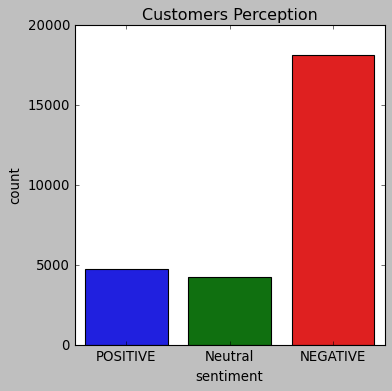

In [75]:
fig = plt.figure(figsize = (5,5))
sns.countplot(tweet_text['sentiment'])
plt.title('Customers Perception')

Text(0.5, 1.0, 'Distribution of Sentiment')

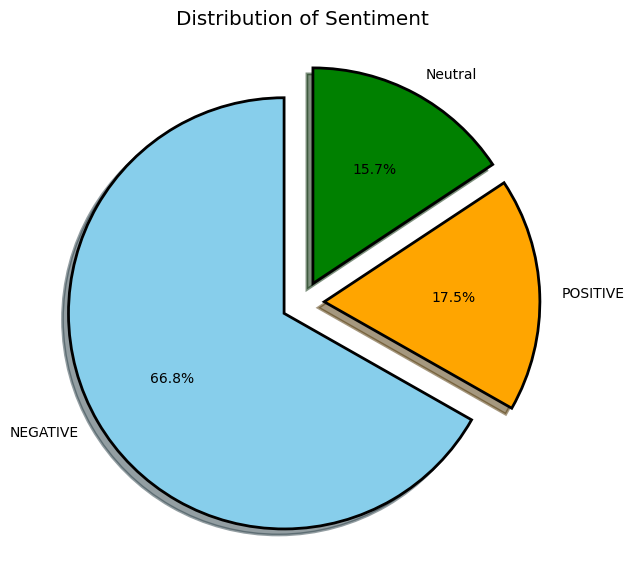

In [29]:
fig = plt.figure(figsize =(7,7))
colors = ('skyblue', 'orange', 'green')
wp = {'linewidth': 2, 'edgecolor': 'black'}
tags = tweet_text['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow =True, colors = colors,
         startangle=90, wedgeprops = wp, explode=explode, label ='')
plt.title('Distribution of Sentiment')

## Data Exploration
I wanted to know the most common words used using Counter, generatd WordCloud and plotted a barchart using seaborn for all negative, positive and neutral sentiment.

In [30]:
# Get the most Common Keywords 

from collections import Counter

In [31]:
tweets_strings = tweet_text['clean_tweet'].tolist()
tweet_list = []
for item in tweets_strings:
    item = item.split()
    for i in item:
        tweet_list.append(i)
counts = Counter(tweet_list)
list_df = pd.DataFrame.from_dict(counts, orient = 'index').reset_index()
list_df.columns = ['Words', 'Count']
list_df.sort_values(by = 'Count', ascending = False, inplace = True)


In [32]:
list_df.head(10)

,Words,Count
14,bank,30365
9,transaction,10739
647,worst,10051
1946,useless,8471
23,account,6617
53,money,4598
35,please,3641
398,service,2610
271,app,2503
1391,ever,2501


In [33]:
pos_tweets = tweet_text[tweet_text['sentiment'] == 'POSITIVE']['clean_tweet']
neg_tweets = tweet_text[tweet_text['sentiment'] == 'NEGATIVE']['clean_tweet']
neut_tweets = tweet_text[tweet_text['sentiment'] == 'Neutral']['clean_tweet']
pos_tweets

0        er_soumya hi soumya already informed rare inst...
1        hemant27367066 transaction processing txn30284...
6        avi_monu10 unauthorisedtransactionsbicoin call...
7        avi_monu10 order assist effectively kindly ela...
10       please check revert well wise quit bank 1st tr...
                               ...                        
28462    judytgolf well said earlier year wouldnt run t...
28477    biondough nothing fraudulent winning super bow...
28489    incredible yes yet today rbc ceo dave mckay he...
28512    mikishuabiki many clothes bought many later di...
28567    roaming_free_ coloured_vistas scottapogee find...
Name: clean_tweet, Length: 4755, dtype: object

In [34]:
#Tokenization
pos_tokens = [token for line in pos_tweets for token in line.split()]
neut_tokens = [token for line in neut_tweets for token in line.split()]
neg_tokens = [token for line in neg_tweets for token in line.split()]
pos_tokens

['er_soumya',
 'hi',
 'soumya',
 'already',
 'informed',
 'rare',
 'instance',
 'payment',
 'online',
 'transaction',
 'unsuccessful',
 'refund',
 'entire',
 'amount',
 'bank',
 'bank',
 'may',
 'take',
 '7',
 '10',
 'working',
 'days',
 'reflect',
 'amount',
 'back',
 'account',
 'regards',
 'kunal',
 'hemant27367066',
 'transaction',
 'processing',
 'txn302845249',
 'request',
 'contact',
 'banks',
 'support',
 'exact',
 'status',
 'refund',
 'please',
 'let',
 'us',
 'know',
 'anything',
 'else',
 'may',
 'assist',
 '22',
 'avi_monu10',
 'unauthorisedtransactionsbicoin',
 'call',
 'contact',
 'center',
 'toll',
 'free',
 'number',
 '1800',
 '11',
 '1109',
 'toll',
 'free',
 'mobile',
 'number9449112211',
 'toll',
 'number',
 '08026599990',
 'report',
 'unauthorized',
 'transaction',
 'register',
 'complaint',
 'fraud',
 'transaction',
 '24',
 'avi_monu10',
 'order',
 'assist',
 'effectively',
 'kindly',
 'elaborate',
 'concern',
 'via',
 'dm',
 'happy',
 'assist',
 'unauthorized',
 

In [35]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [36]:
most_common_pos_tweet = get_tokens(pos_tokens)
most_common_neut_tweet = get_tokens(neut_tokens)
most_common_neg_tweet = get_tokens(neg_tokens)
most_common_pos_tweet

{'bank': 4932,
 'transaction': 4002,
 'account': 1458,
 'money': 937,
 'kindly': 795,
 'please': 747,
 'useless': 720,
 'number': 655,
 'us': 610,
 'hi': 560,
 'amount': 538,
 'dm': 518,
 'details': 495,
 'successful': 451,
 'first': 441,
 'card': 438,
 'via': 416,
 'id': 404,
 'good': 382,
 'worst': 362,
 'get': 353,
 'like': 329,
 'date': 327,
 'app': 317,
 'dont': 317,
 'since': 316,
 'share': 315,
 'best': 307,
 'would': 291,
 'payment': 290}

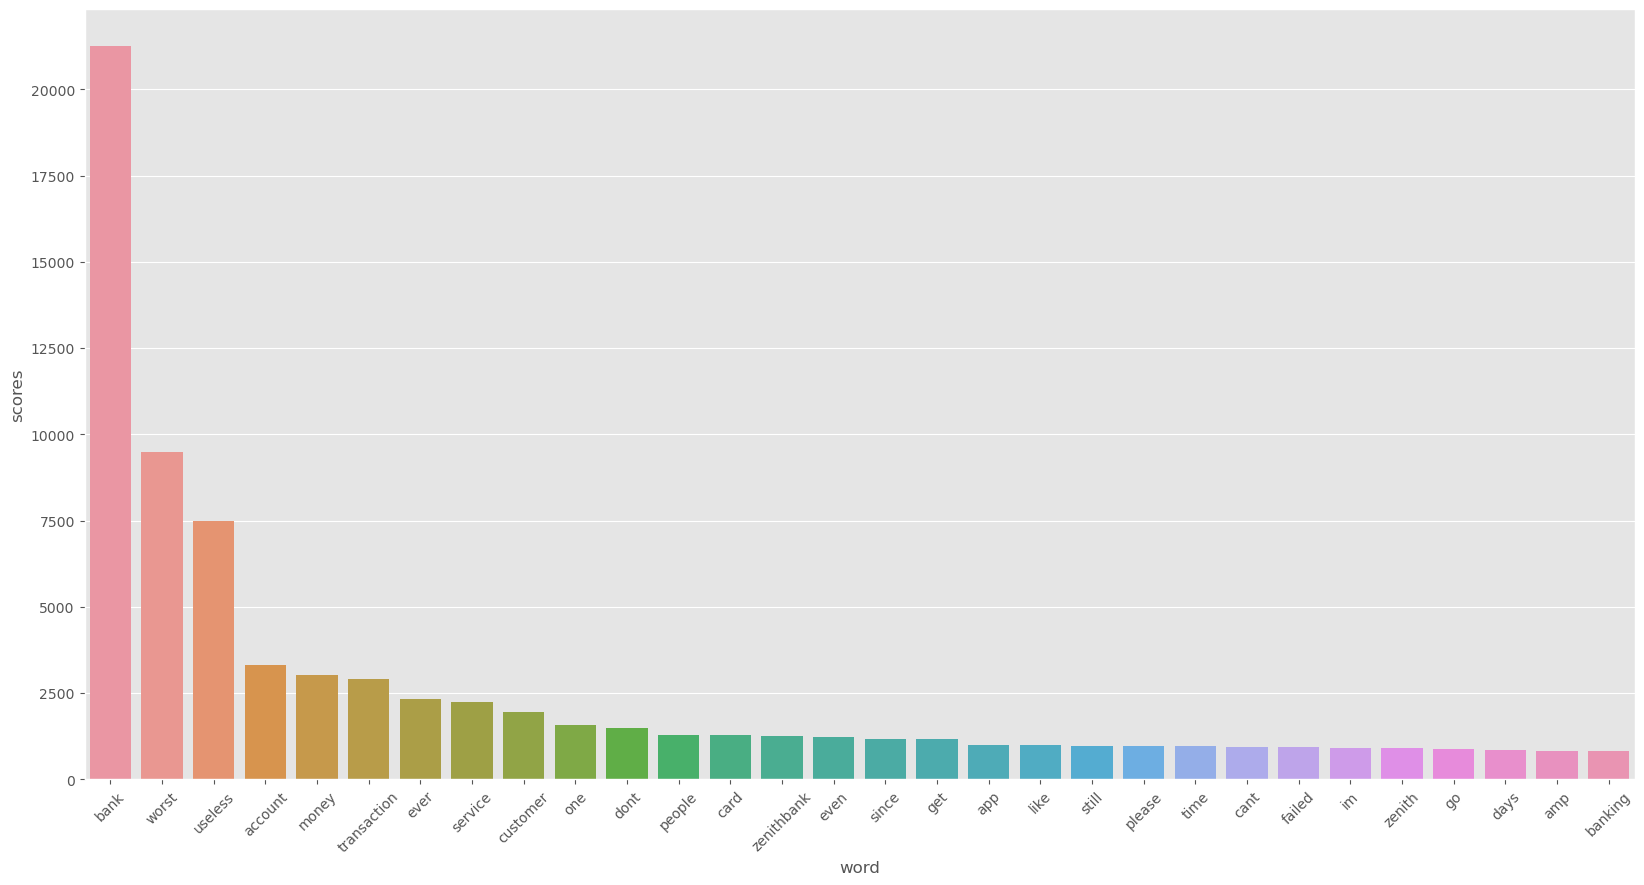

In [37]:
# Plot with Seaborn
neg_df = pd.DataFrame(most_common_neg_tweet.items(),columns=['word', 'scores'])
plt.figure(figsize = (20,10))
sns.barplot(x='word', y= 'scores', data=neg_df)
plt.xticks(rotation=45)
plt.show()

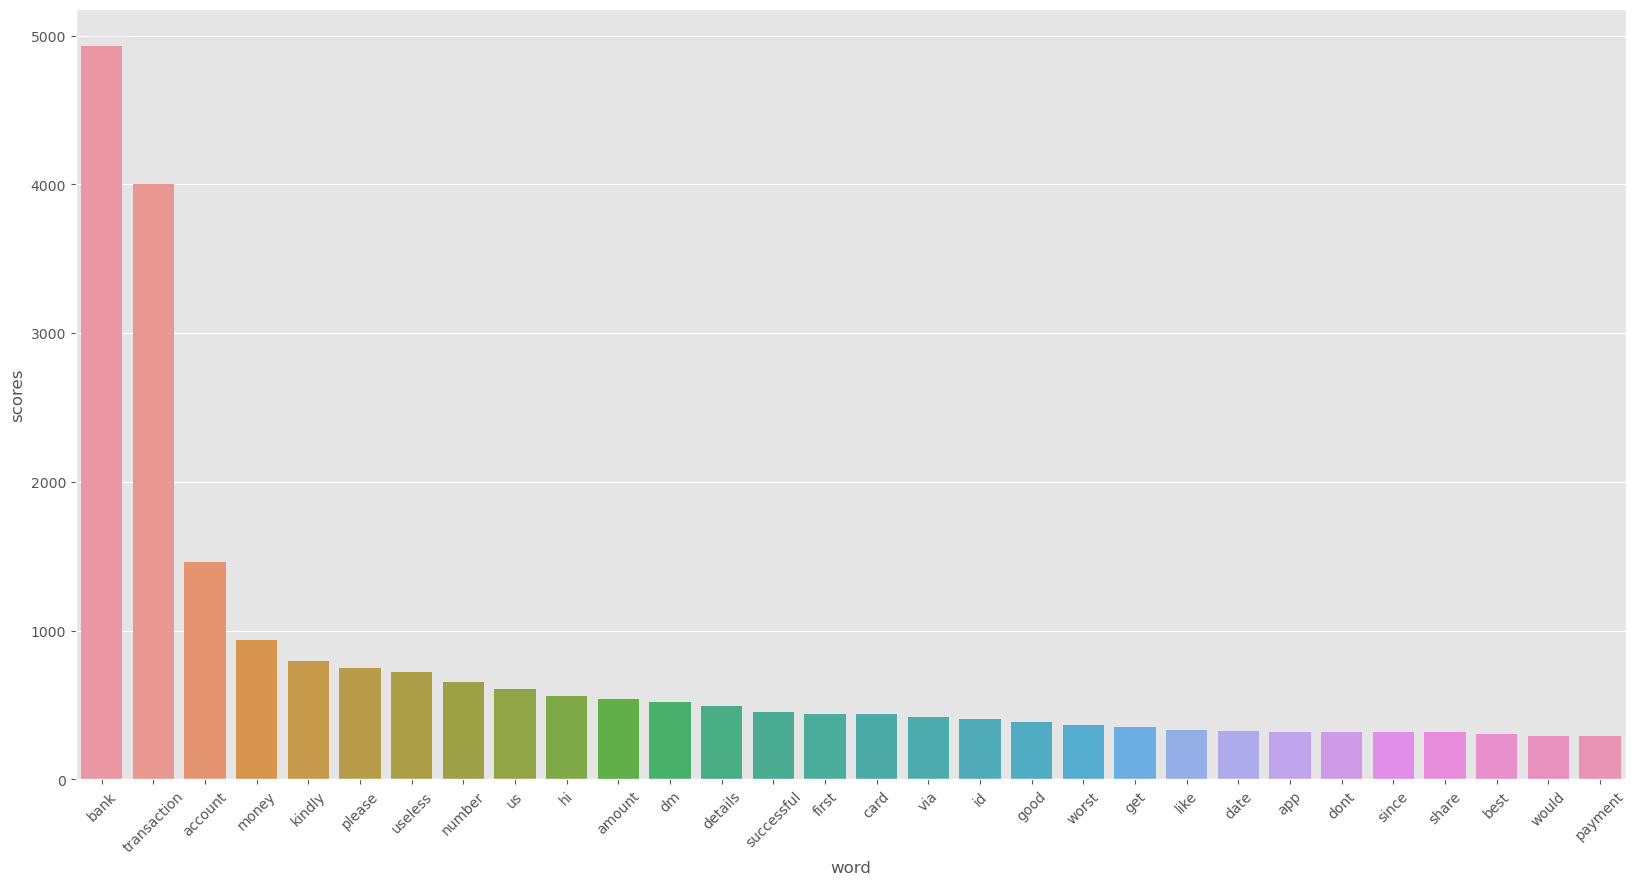

In [38]:
# Plot with Seaborn


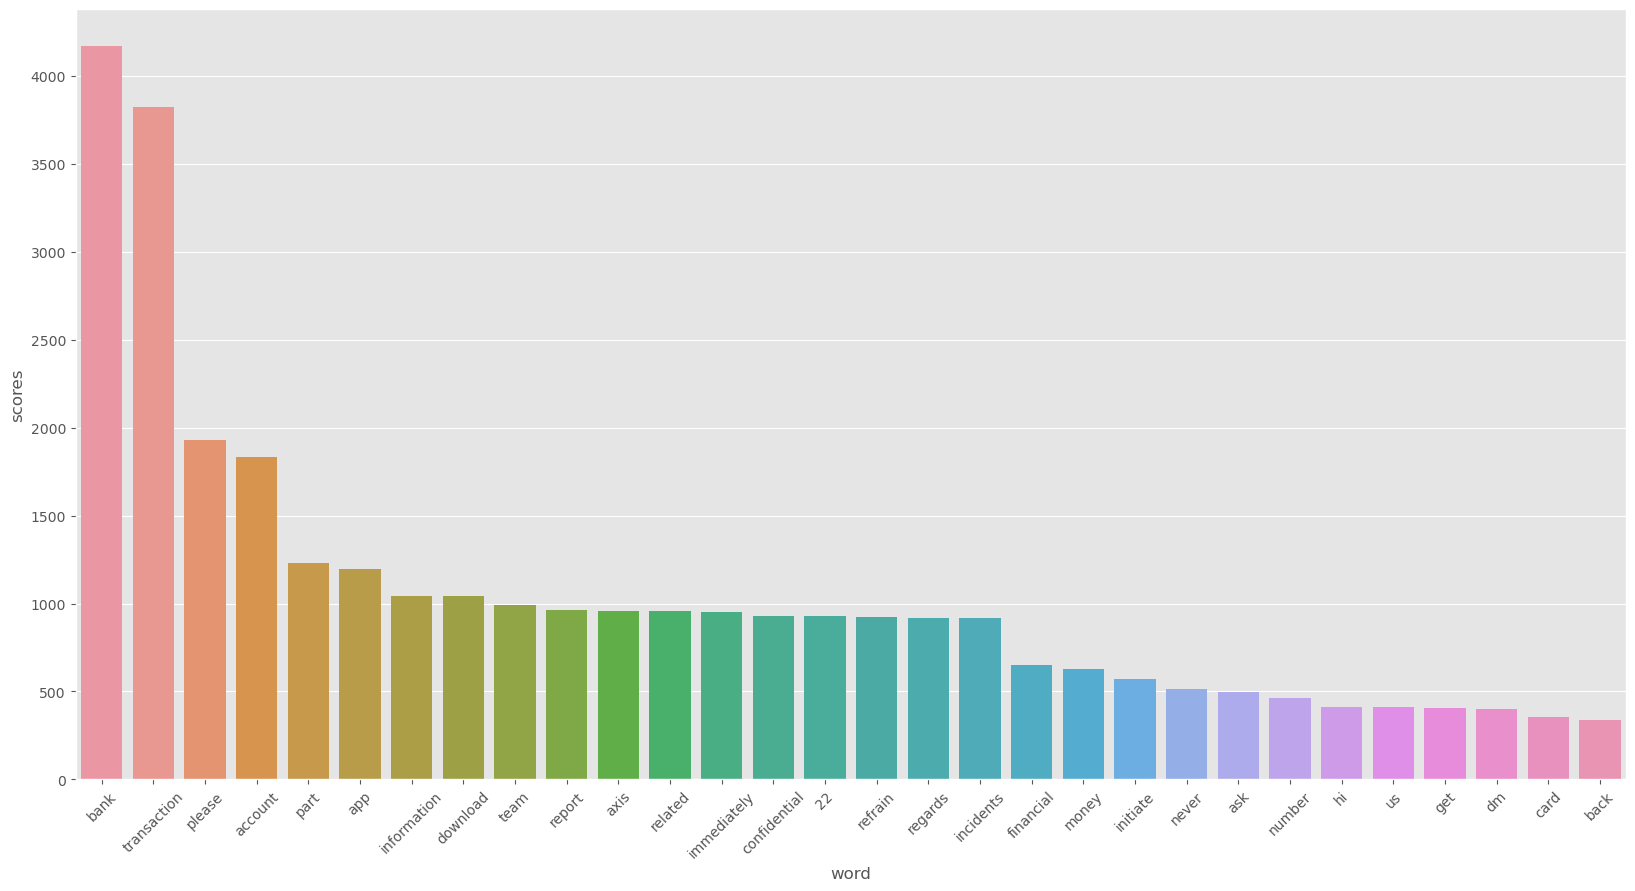

In [39]:
# Plot with Seaborn
neut_df = pd.DataFrame(most_common_neut_tweet.items(),columns=['word', 'scores'])
plt.figure(figsize = (20,10))
sns.barplot(x='word', y= 'scores', data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [40]:
from wordcloud import WordCloud
pos_tweets = tweet_text[tweet_text.sentiment == 'POSITIVE']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)[:500]
pos_tweets

,tweet,clean_tweet,bank_names,polarity,sentiment
6707,#CryptoGuide #Bank #crypto #Cryptofriendly #Fi...,cryptoguide bank crypto cryptofriendly financi...,access,1.0,POSITIVE
7915,"Best bank for you (in terms of security, speed...",best bank terms security speedy response conce...,,1.0,POSITIVE
1352,@HDFCBank_Cares @HDFC_Bank Rs 2.6k is debited ...,hdfcbank_cares hdfc_bank rs 26k debited card e...,,1.0,POSITIVE
5790,@BootsHelp the money has not been credited aft...,bootshelp money credited 8 days like said cont...,,1.0,POSITIVE
9218,@Grafianfollicle It may help increase e transa...,grafianfollicle may help increase e transactio...,,1.0,POSITIVE
...,...,...,...,...,...
6237,@Ogunley77838151 @instablog9ja Thank you for c...,ogunley77838151 instablog9ja thank contacting ...,wema,0.6,POSITIVE
6262,@myaccessbank @udacity Kindly help look into m...,myaccessbank udacity kindly help look case pos...,,0.6,POSITIVE
6268,@accessbank_help It's been 20days now since th...,accessbank_help 20days since declined transact...,,0.6,POSITIVE
6289,@TheOfficialSBI today I deposit money in accou...,theofficialsbi today deposit money account cdm...,,0.6,POSITIVE


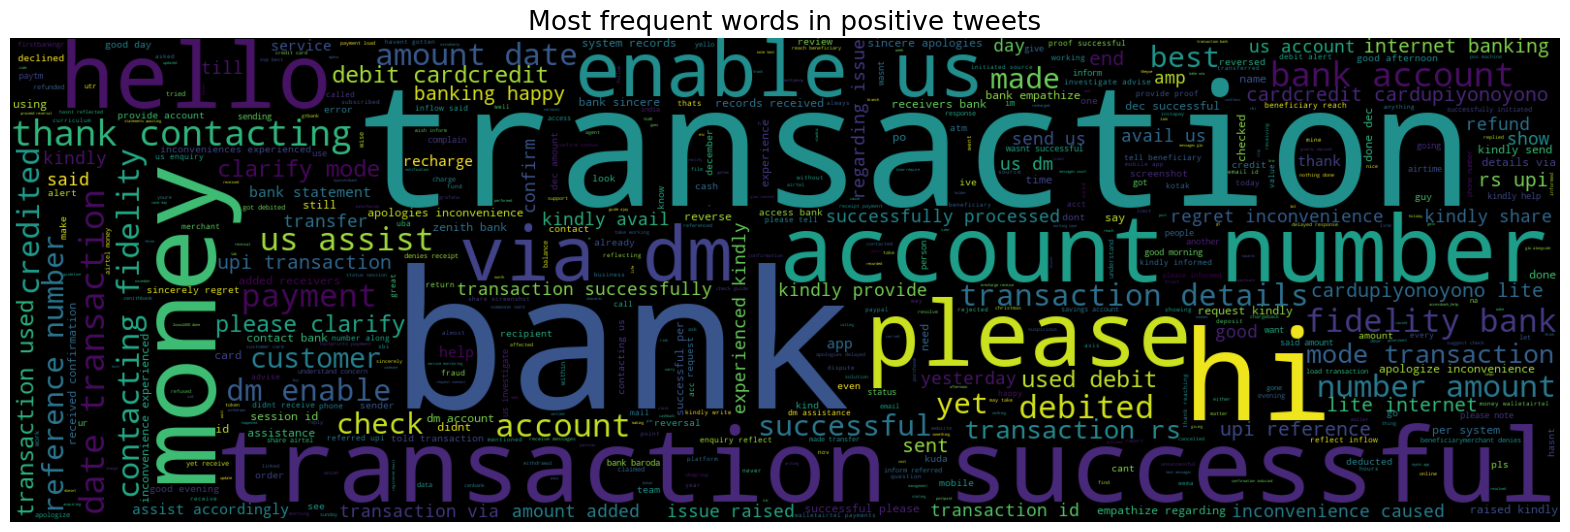

In [41]:
text = ''.join([word for word in pos_tweets['clean_tweet']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width =1600, height=500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [42]:
neg_tweets = tweet_text[tweet_text.sentiment == 'NEGATIVE']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets

,tweet,clean_tweet,bank_names,polarity,sentiment
7175,"""7 core functions of V/MA which have proven di...",7 core functions vma proven difficult others r...,,-6.938894e-18,NEGATIVE
2781,Be careful. Got out of a bank with a brown env...,careful got bank brown envelope full paper rol...,,-6.938894e-18,NEGATIVE
11923,@UBAGroup @UBACares @icpcnigeria @officialEFCC...,ubagroup ubacares icpcnigeria officialefcc cen...,uba uba,-9.251859e-18,NEGATIVE
14445,@JeremyVineOn5 What's not fair is a government...,jeremyvineon5 whats fair government profligate...,,-1.850372e-17,NEGATIVE
20475,@JetsenSunday that’s the worst part of all of ...,jetsensunday thats worst part getting nice eno...,,-2.220446e-17,NEGATIVE
...,...,...,...,...,...
23640,@UBAGroup the worst UBA bank branch is in Gbok...,ubagroup worst uba bank branch gboko benue state,uba uba,-1.000000e+00,NEGATIVE
23644,@Paytm @Paytmcare has the worst customer suppo...,paytm paytmcare worst customer support ever se...,,-1.000000e+00,NEGATIVE
23649,@PietRietman @LawPension “Bij mijn weten”… wee...,pietrietman lawpension bij mijn weten weet je ...,,-1.000000e+00,NEGATIVE
23655,WARNING: DO NOT BUY ANY HDFC POLICY @HDFCLIFE ...,warning buy hdfc policy hdfclife scam im worst...,,-1.000000e+00,NEGATIVE


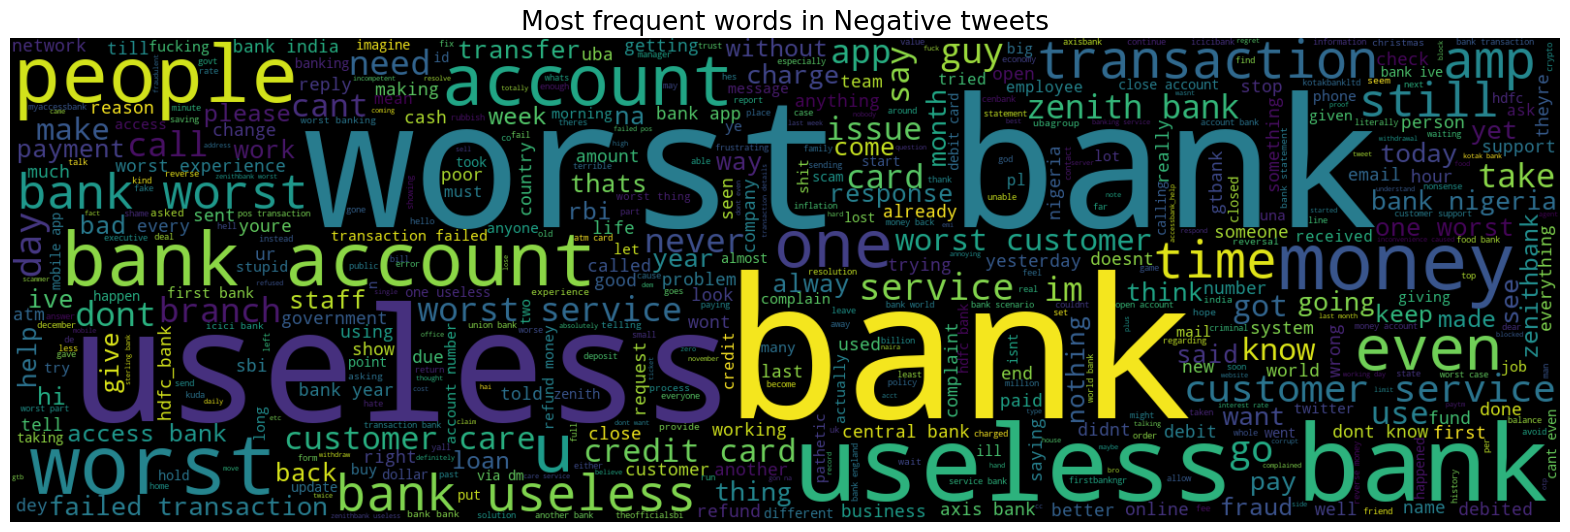

In [43]:
text = ''.join([word for word in neg_tweets['clean_tweet']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width =1600, height=500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative tweets', fontsize=19)
plt.show()

In [44]:
neut_tweets = tweet_text[tweet_text.sentiment == 'Neutral']
neut_tweets = neut_tweets.sort_values(['polarity'], ascending = False)
neut_tweets

,tweet,clean_tweet,bank_names,polarity,sentiment
2,@TheOfficialSBI I made a UPI transaction on 09...,theofficialsbi made upi transaction 09 decembe...,,0.0,Neutral
7830,@Suchitrapal95 transaction or download any app...,suchitrapal95 transaction download app part co...,,0.0,Neutral
7791,executed and generate the transaction pin that...,executed generate transaction pin fortuitous d...,,0.0,Neutral
7794,@pkjacks @woye1 @umadecave It will favour your...,pkjacks oye1 umadecave favour plan well sire f...,,0.0,Neutral
7795,@IAhorsu @thebankofghana Which Bank? I did a t...,iahorsu thebankofghana bank transaction last f...,,0.0,Neutral
...,...,...,...,...,...
4036,@Sourin_Ghatak financial transaction or downlo...,sourin_ghatak financial transaction download a...,,0.0,Neutral
4039,"@Gcleffkanye Hello there, thank you for reachi...",gcleffkanye hello thank reaching us shared tra...,,0.0,Neutral
4040,"@kushallodha548 Hi Kushal, we sincerely regret...",kushallodha548 hi kushal sincerely regret inco...,,0.0,Neutral
4041,@PiggyBankNG The profit from my savings helps ...,piggybankng profit savings helps forgive theft...,,0.0,Neutral


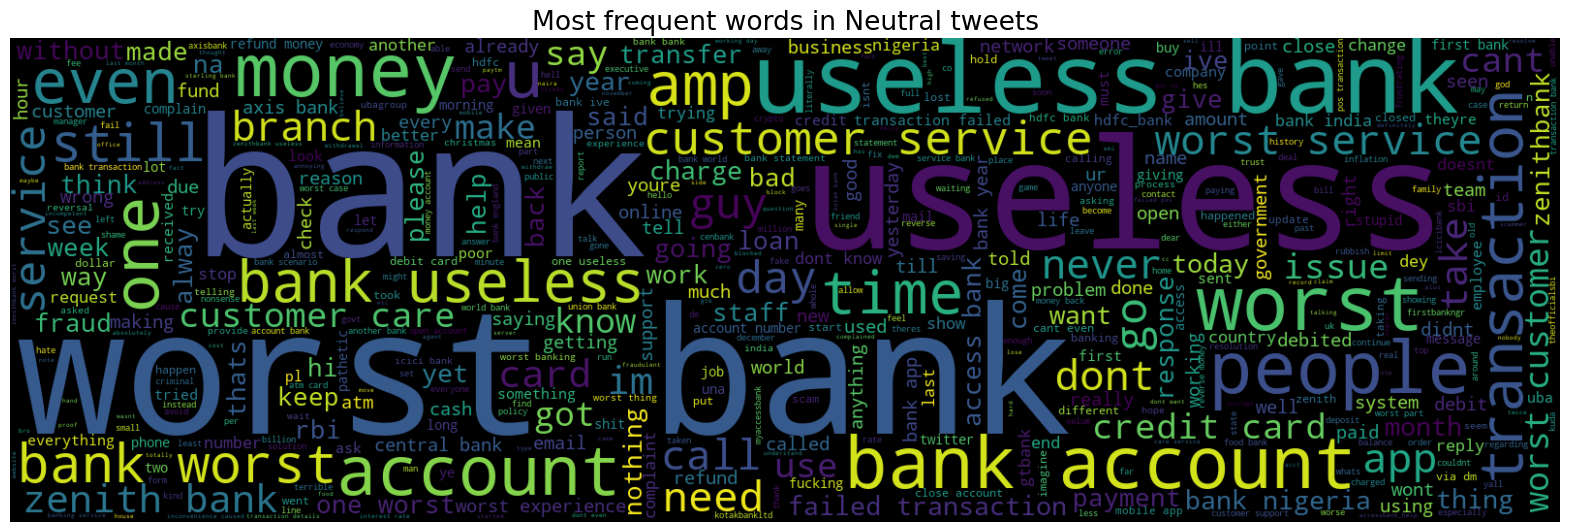

In [45]:
text = ' '.join([word for word in neg_tweets['clean_tweet']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=500, width =1600, height=500).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Neutral tweets', fontsize=19)
plt.show()

## 7. Classification Model
I want to draw conclusions from our input base on the training data. I fitted differnt machine learning model. 

In [46]:
#imported sklearn library for classifications and predictive data analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Bag of words vectorization

In [76]:
vectorizer = CountVectorizer(ngram_range=(1,2)).fit(tweet_text['clean_tweet'])
feature_names = vectorizer.get_feature_names()

In [49]:
x = tweet_text['clean_tweet']
y = tweet_text['sentiment']
x = vectorizer.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [50]:
print('Size of x_train', (x_train.shape))
print('Size of y_train', (y_train.shape))
print('Size of x_test', (x_test.shape))
print('Size of x_test', (x_test.shape))

Size of x_train (21702, 315080)
Size of y_train (21702,)
Size of x_test (5426, 315080)
Size of x_test (5426, 315080)


In [51]:
len(y)

27128

### Classification
####  Logistics Regression

In [77]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print('Test accuracy: {:.2f}%'.format(logreg_acc*100))

Test accuracy: 90.95%


In [53]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[3491   77   61]
 [  68  725   51]
 [ 123  111  719]]


              precision    recall  f1-score   support

    NEGATIVE       0.95      0.96      0.95      3629
     Neutral       0.79      0.86      0.83       844
    POSITIVE       0.87      0.75      0.81       953

    accuracy                           0.91      5426
   macro avg       0.87      0.86      0.86      5426
weighted avg       0.91      0.91      0.91      5426



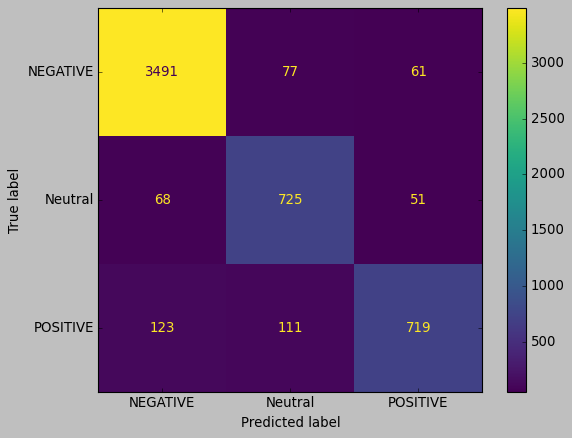

In [54]:
# Confuison matrix to allow visualizatin of the performance of af an algorithm.
from matplotlib import style
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [55]:
### Tuning our model (with Grid Search)

In [78]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C':[0.001, 0.01, 0.1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 10]})

In [57]:
print('Best parameter:', grid.best_params_)

Best parameter: {'C': 10}


In [58]:
y_pred = grid.predict(x_test)
grid_accura = accuracy_score(y_pred, y_test)
print('Test accuracy: {:.2f}%'.format(grid_accura*100) )

Test accuracy: 91.28%


In [59]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[3492   78   59]
 [  60  728   56]
 [ 113  107  733]]


              precision    recall  f1-score   support

    NEGATIVE       0.95      0.96      0.96      3629
     Neutral       0.80      0.86      0.83       844
    POSITIVE       0.86      0.77      0.81       953

    accuracy                           0.91      5426
   macro avg       0.87      0.86      0.87      5426
weighted avg       0.91      0.91      0.91      5426



### Linear SVM (support vector machine)

In [60]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(x_train, y_train)

LinearSVC()

In [61]:
svc_pred = svc_model.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print('Test accuracy: {:.2f}%'.format(svc_acc*100))

Test accuracy: 91.50%


In [62]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test, svc_pred))

                       

[[3505   72   52]
 [  62  730   52]
 [ 108  115  730]]


              precision    recall  f1-score   support

    NEGATIVE       0.95      0.97      0.96      3629
     Neutral       0.80      0.86      0.83       844
    POSITIVE       0.88      0.77      0.82       953

    accuracy                           0.92      5426
   macro avg       0.88      0.87      0.87      5426
weighted avg       0.92      0.92      0.91      5426



# Congratulation You made it to This Part!

### check out how I test run what we have been doing  with our models

In [63]:
# I feel it is expedient to have a feel/taste of our model, it sure came out well.
test_set = ['the customer care can do more', 'worst bank ever', 'I recommend they are good']
new_test =vectorizer.transform(test_set)
svc_model.predict(new_test)

array(['Neutral', 'NEGATIVE', 'POSITIVE'], dtype=object)

# We can say Linear SVM gave us the best model
## Thank you for going through this journey with, I hope you like what you've seen through this notebook?
### Don't forget to save your model, maybe I should that

## Kindly view and follow my other pages with the link below.
[LinkedIn Profile](http://linkedin.com/in/ndubisi-precious) <br>
[Github](http://github.com/ndubuisi-precious) <br>
[Twitter Profile](http://twitter.com/ndubisiprecious) <br>
[Shield Agency](http://shieldagency.ng) _For online marketing_